# Sonic log - Dalbyover 59.459  

Reading LAS wireline log file, calculate sonic velocity from arrival times. 

There are two problems that I didn't solve yet: 

1. Wrong scaling of the entire log. The velocities are about (?) 3 times too high. I also tried to calculate velocities from the distances according to the factsheet of the tool (0.60, 0.80 and 1.00m) and the times in $\mu$s (column 2,3,4 in LAS-file), but the results are exacetly the same as the precalculated velocities (column 5,6,7 in LAS-file). 

2. R2R1 and R3R2 don't agree in the upper 40m, the most interesting depths fo us. Can it be related to Cycle Skipping?



In [28]:
#Plot in document
%matplotlib inline

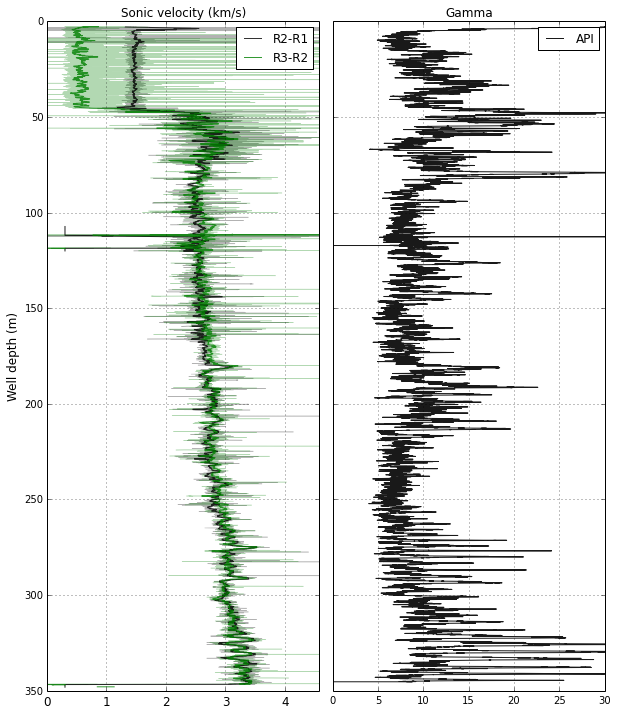

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

def smooth_filter(raw,kernel):
    return signal.medfilt(raw, kernel_size=kernel)

# In files 
in_files = ['data/TRGS8068-Dalbyover5.LAS', 'data/TRGS8068-Dalbyover4.LAS']
in_data = np.empty([0, 9])

for file in in_files:
	read_data = np.genfromtxt(file, skiprows=38, delimiter=(10,)+(9,)+(14,)*7)
	in_data = np.concatenate((in_data,read_data),axis=0)

# Save file with velocity data
#np.savetxt('data.txt',in_data,fmt='%5.2f') 

# Apply smoothing filter kernel is median window size, must be odd
kernel=71

# Try scaling of velocity. Try e.g. 0.3048, meters to feet.
C = 0.3048

# Plot sonic
fig = plt.figure(figsize=(10,12))
fig.subplots_adjust(wspace=0.05)

ax1 = plt.subplot(121)
ax1.set_ylim(ax1.get_ylim()[::-1]) 
plt.title('Sonic velocity (km/s)', fontsize = 12)
plt.ylabel('Well depth (m)', fontsize = 12)

#Plot raw data
plt.plot(C*in_data[:,5],in_data[:,0]+0.1, lw=0.5, color='black', alpha=0.3)
plt.plot(C*in_data[:,6],in_data[:,0]-0.1, lw=0.5, color='green', alpha=0.3)
#plt.plot(C*in_data[:,7],in_data[:,0], lw=0.5, color='cyan', label='R3-R1', alpha=0.3)

#Plot filtered data
plt.plot(smooth_filter(C*in_data[:,5],kernel),in_data[:,0]+0.1, lw=1, color='black', label='R2-R1', alpha=0.8)
plt.plot(smooth_filter(C*in_data[:,6],kernel),in_data[:,0]-0.1, lw=1, color='green', label='R3-R2', alpha=0.8)
#plt.plot(smooth_filter(C*in_data[:,7],kernel),in_data[:,0], lw=1, color='cyan', label='R3-R1', alpha=0.8)

plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.xlim(0, 15*C)
plt.grid()
plt.legend()

# Plot gamma
ax2 = plt.subplot(122, sharey=ax1)
plt.title('Gamma', fontsize = 12)
plt.plot(in_data[:,8],in_data[:,0]+0.1, lw=1, color='black', label='API', alpha=0.9)
plt.xlim(0, 30)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.grid()
plt.legend()

plt.show()

Plots of velocities from R2-R1 and R3-R2. R3-R1 is commented out for clarity. 